In [1]:
try:
    import os
    import sys
    import glob
    import h5py
    import numpy as np
    import pandas as pd
    import torch
    import matplotlib.pyplot as plt
    from PIL import Image
except Exception as e:
    print(f"Error : {e}")

In [2]:
# Print the PyTorch version
print(f"PyTorch version: {torch.__version__}")

# Check if running in Google Colab
if "google.colab" in str(get_ipython()):
    if torch.cuda.is_available():
        device = "cuda"
    else:
        device = 'cpu'
        print("GPU not available in Colab, consider enabling a GPU runtime.")
# Running on a local machine
else:
    if torch.backends.mps.is_available():
        device = 'mps'
        print(f"Is Apple MPS (Metal Performance Shader) built? {torch.backends.mps.is_built()}")
        print(f"Is Apple MPS available? {torch.backends.mps.is_available()}")
    elif torch.cuda.is_available():
        device = 'cuda'
    else:
        device = 'cpu'

# TODO: Add support for AMD ROCm GPU if needed

# Print the device being used
print(f"Using device: {device}")

PyTorch version: 2.5.1
Is Apple MPS (Metal Performance Shader) built? True
Is Apple MPS available? True
Using device: mps


In [3]:
import geopandas as gpd

# Load the GeoJSON file
geojson_path = 'Combined.geojson'
gdf = gpd.read_file(geojson_path)

# Display basic information
print(gdf.info())
print(gdf.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        104 non-null    object  
 1   name      104 non-null    object  
 2   styleUrl  104 non-null    object  
 3   geometry  104 non-null    geometry
dtypes: geometry(1), object(3)
memory usage: 3.4+ KB
None
                     id             name  \
0  08FA09827D3407E9160C  PLOT1-Converted   
1  0F575A80C63407FAABC3  PLOT2-Converted   
2  083ADD85553407FB16F6  PLOT3-Converted   
3  04B6955BE53407FC6E55  PLOT4-Converted   
4  0D7B4BAA923407FDF1AA  PLOT5-Converted   

                                styleUrl  \
0  #__managed_style_0790791CB73409F1A614   
1  #__managed_style_0790791CB73409F1A614   
2  #__managed_style_0790791CB73409F1A614   
3  #__managed_style_0790791CB73409F1A614   
4  #__managed_style_0790791CB73409F1A614   

                                            geometry  
0  PO

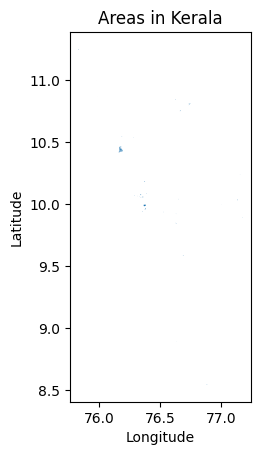

In [4]:
import matplotlib.pyplot as plt

# Plot the geospatial data
gdf.plot()
plt.title('Areas in Kerala')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [5]:
import geopandas as gpd

# Load the GeoJSON file
geojson_path = '../Datasets/Sentinel-2/deforestation_labels.geojson'
gdf = gpd.read_file(geojson_path)

# Display basic information
print(gdf.info())
print(gdf.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5696 entries, 0 to 5695
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   img_date  5696 non-null   datetime64[ms]
 1   tile      5696 non-null   object        
 2   geometry  5696 non-null   geometry      
dtypes: datetime64[ms](1), geometry(1), object(1)
memory usage: 133.6+ KB
None
    img_date   tile                                           geometry
0 2016-04-09  36UXA  POLYGON ((35.7913 50.17406, 35.79277 50.17354,...
1 2016-04-09  36UXA  POLYGON ((35.77653 50.10271, 35.7781 50.10318,...
2 2016-04-09  36UXA  POLYGON ((35.78621 50.01277, 35.78616 50.01369...
3 2016-04-09  36UXA  POLYGON ((35.78007 50.00556, 35.78189 50.00557...
4 2016-04-09  36UXA  POLYGON ((35.79781 49.99568, 35.79908 49.99582...


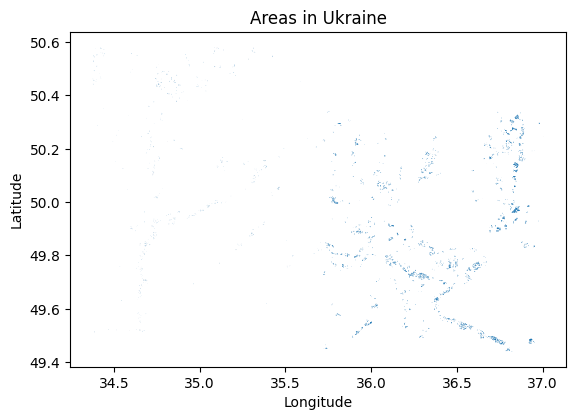

In [6]:
import matplotlib.pyplot as plt

# Plot the geospatial data
gdf.plot()
plt.title('Areas in Ukraine')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [7]:
# Ensure the GeoDataFrame has a projected coordinate system
gdf = gdf.to_crs(epsg=32635)  # UTM zone 35N, suitable for Ukraine

# Calculate area in square meters
gdf['area_sqm'] = gdf['geometry'].area

# Display the areas
print(gdf[['geometry', 'area_sqm']])

                                               geometry      area_sqm
0     POLYGON ((1127320.26 5595077.678, 1127432.017 ...  21408.410578
1     POLYGON ((1127206.118 5587037.471, 1127311.654...  26789.943916
2     POLYGON ((1129079.494 5577140.292, 1129063.36 ...  32461.332328
3     POLYGON ((1128734.939 5576288.573, 1128864.689...  21436.304237
4     POLYGON ((1130133.542 5575342.622, 1130222.508...  29703.810244
...                                                 ...           ...
5691  POLYGON ((1168903.91 5600152.018, 1168912.295 ...   2982.201070
5692  POLYGON ((1169159.773 5600158.138, 1169161.855...    240.328877
5693  POLYGON ((1135448.789 5601678.119, 1135446.907...   4465.122975
5694  POLYGON ((1203729.198 5615081.067, 1203812.121...  11547.493591
5695  POLYGON ((1203729.198 5615081.067, 1203812.121...  11547.493591

[5696 rows x 2 columns]


In [8]:
import os
from collections import defaultdict
from pprint import pprint

def collect_jp2_files(base_dir):
    jp2_files = defaultdict(list)
    for root, _, files in os.walk(base_dir):
        for file in files:
            if file.endswith(".jp2"):
                jp2_files[os.path.basename(root)].append(os.path.join(root, file))
    return jp2_files

jp2_mapping = collect_jp2_files("../Datasets/Sentinel-2")

# Use pprint to print the defaultdict nicely
pprint(jp2_mapping)

defaultdict(<class 'list'>,
            {'IMG_DATA': ['../Datasets/Sentinel-2/S2B_MSIL1C_20190611T083609_N0207_R064_T36UYA_20190611T122426/S2B_MSIL1C_20190611T083609_N0207_R064_T36UYA_20190611T122426.SAFE/GRANULE/L1C_T36UYA_A011816_20190611T084501/IMG_DATA/T36UYA_20190611T083609_B10.jp2',
                          '../Datasets/Sentinel-2/S2B_MSIL1C_20190611T083609_N0207_R064_T36UYA_20190611T122426/S2B_MSIL1C_20190611T083609_N0207_R064_T36UYA_20190611T122426.SAFE/GRANULE/L1C_T36UYA_A011816_20190611T084501/IMG_DATA/T36UYA_20190611T083609_B04.jp2',
                          '../Datasets/Sentinel-2/S2B_MSIL1C_20190611T083609_N0207_R064_T36UYA_20190611T122426/S2B_MSIL1C_20190611T083609_N0207_R064_T36UYA_20190611T122426.SAFE/GRANULE/L1C_T36UYA_A011816_20190611T084501/IMG_DATA/T36UYA_20190611T083609_B05.jp2',
                          '../Datasets/Sentinel-2/S2B_MSIL1C_20190611T083609_N0207_R064_T36UYA_20190611T122426/S2B_MSIL1C_20190611T083609_N0207_R064_T36UYA_20190611T122426.SAFE/GRANULE/L

In [9]:
example = "../Datasets/Sentinel-2/S2B_MSIL1C_20190611T083609_N0207_R064_T36UYA_20190611T122426/S2B_MSIL1C_20190611T083609_N0207_R064_T36UYA_20190611T122426.SAFE/GRANULE/L1C_T36UYA_A011816_20190611T084501/IMG_DATA/T36UYA_20190611T083609_B02.jp2"

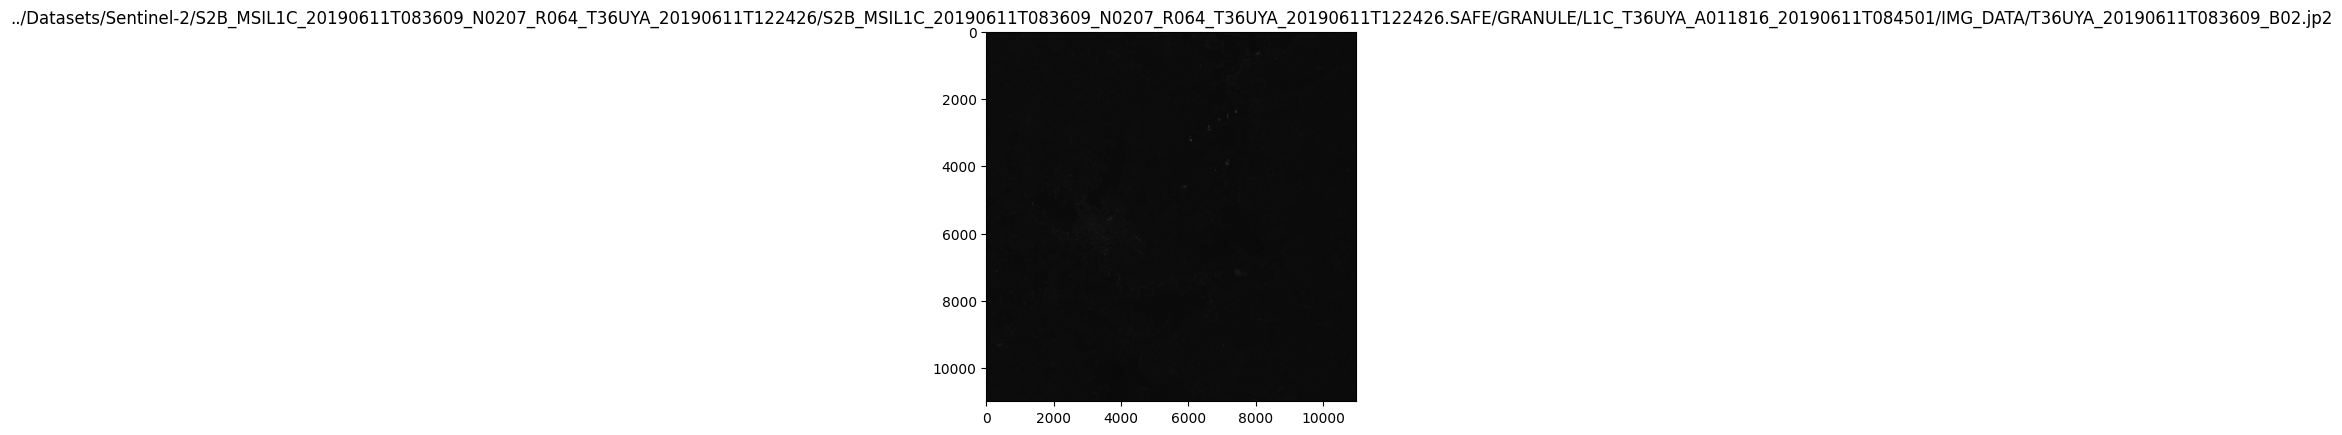

In [10]:
import rasterio
import matplotlib.pyplot as plt

def visualize_band(jp2_path):
    with rasterio.open(jp2_path) as src:
        band = src.read(1)  # Read the first band
        plt.imshow(band, cmap="gray")
        plt.title(jp2_path)
        plt.show()

visualize_band(example)

In [11]:
import rasterio

# Open the .jp2 file
with rasterio.open(example) as dataset:
    # Read the dataset's data as a numpy array
    band_data = dataset.read(1)
    # Access metadata
    metadata = dataset.meta

print(metadata)

{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 36N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",33],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32636"]]'), 'transform': Affine(10.0, 0.0, 699960.0,
       0.0, -10.0, 5600040.0)}


In [12]:
import os
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import json
from pathlib import Path
import geopandas as gpd
from rasterio.mask import mask
from shapely.geometry import mapping
from tqdm import tqdm

# Set the base path
base_path = "../Datasets/Sentinel-2"
base_path = Path(base_path)

# Get all SAFE directories
safe_dirs = list(base_path.glob("*/*.SAFE"))

# Print some basic information
print(f"Number of Sentinel-2 images found: {len(safe_dirs)}")
print("\nExample directory structure:")
print(safe_dirs[0])

Number of Sentinel-2 images found: 50

Example directory structure:
../Datasets/Sentinel-2/S2B_MSIL1C_20190611T083609_N0207_R064_T36UYA_20190611T122426/S2B_MSIL1C_20190611T083609_N0207_R064_T36UYA_20190611T122426.SAFE


Dataset Summary:
--------------------------------------------------
Date range: 2016-02-12 08:40:52 to 2019-09-09 08:35:59
Number of unique tiles: 2
Number of satellites: 2

Satellite distribution:
satellite
S2A    33
S2B    17
Name: count, dtype: int64

Tile distribution:
tile_id
T36UYA    38
T36UXA    12
Name: count, dtype: int64


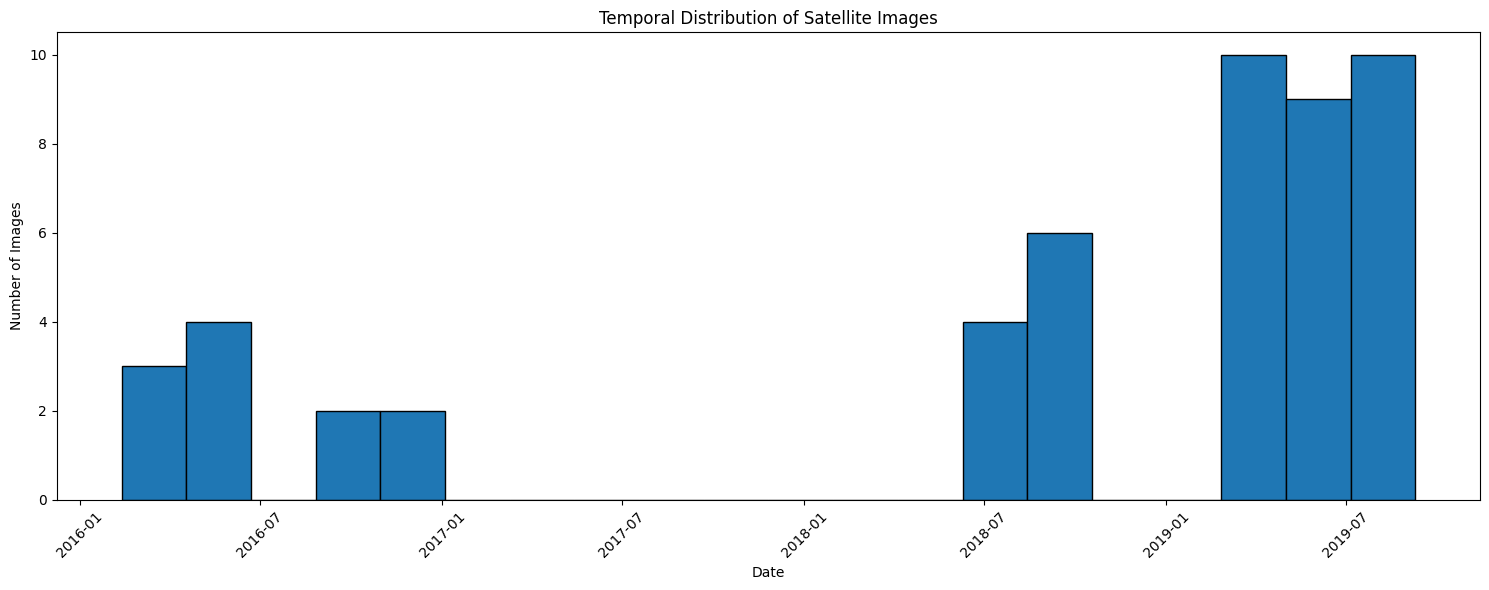

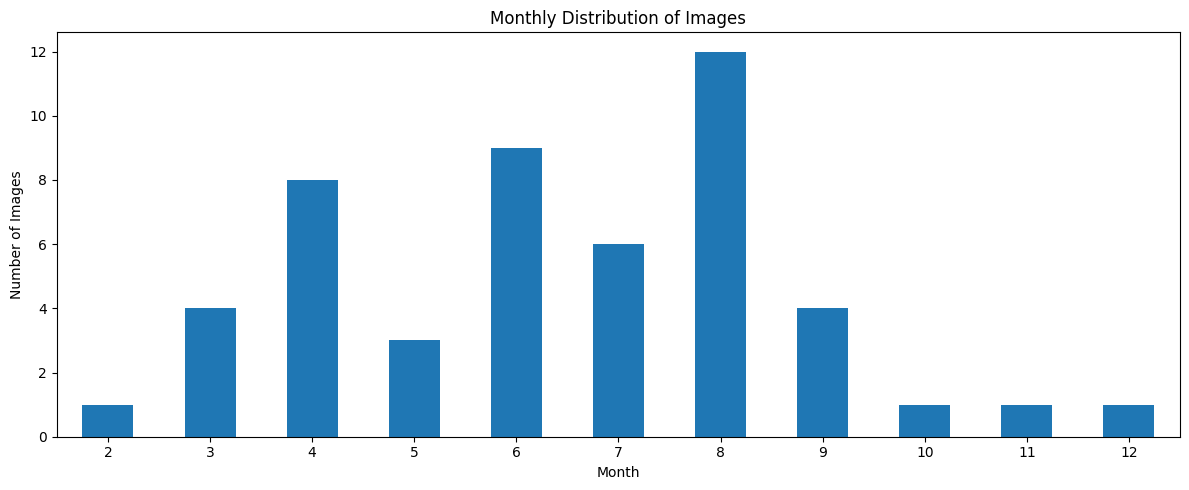

In [13]:
# Create a list to store metadata
metadata_list = []

for safe_dir in safe_dirs:
    # Parse directory name
    dir_parts = safe_dir.name.split('_')
    
    metadata = {
        'satellite': dir_parts[0],  # S2A or S2B
        'processing_level': dir_parts[1],  # MSIL1C
        'timestamp': datetime.strptime(dir_parts[2], '%Y%m%dT%H%M%S'),
        'relative_orbit': dir_parts[4],  # R064
        'tile_id': dir_parts[5],  # T36UYA
        'path': safe_dir
    }
    metadata_list.append(metadata)

# Create DataFrame
df_metadata = pd.DataFrame(metadata_list)

# Basic analysis
print("Dataset Summary:")
print("-" * 50)
print(f"Date range: {df_metadata['timestamp'].min()} to {df_metadata['timestamp'].max()}")
print(f"Number of unique tiles: {df_metadata['tile_id'].nunique()}")
print(f"Number of satellites: {df_metadata['satellite'].nunique()}")
print("\nSatellite distribution:")
print(df_metadata['satellite'].value_counts())
print("\nTile distribution:")
print(df_metadata['tile_id'].value_counts())

# Visualize temporal distribution
plt.figure(figsize=(15, 6))
plt.hist(df_metadata['timestamp'], bins=20, edgecolor='black')
plt.title('Temporal Distribution of Satellite Images')
plt.xlabel('Date')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly distribution
df_metadata['month'] = df_metadata['timestamp'].dt.month
monthly_counts = df_metadata['month'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
monthly_counts.plot(kind='bar')
plt.title('Monthly Distribution of Images')
plt.xlabel('Month')
plt.ylabel('Number of Images')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [14]:
# Get the first image directory to analyze bands
first_image = safe_dirs[0]
img_data_path = list((first_image / "GRANULE").glob("*"))[0] / "IMG_DATA"
band_files = list(img_data_path.glob("*.jp2"))

# Extract band information
band_info = []
for band_file in band_files:
    band_name = band_file.name.split('_')[-1].split('.')[0]
    
    # Open the band file to get metadata
    with rasterio.open(band_file) as src:
        band_info.append({
            'band': band_name,
            'width': src.width,
            'height': src.height,
            'dtype': src.dtypes[0],
            'resolution': src.res[0]  # pixel size in meters
        })

# Create DataFrame with band information
df_bands = pd.DataFrame(band_info)
print("Band Information:")
print("-" * 50)
print(df_bands.sort_values('band'))

# Count number of files per image
print("\nNumber of files per image:")
print(len(band_files))

# Print list of unique bands
print("\nAvailable bands:")
unique_bands = sorted(list(df_bands['band'].unique()))
print(unique_bands)

Band Information:
--------------------------------------------------
   band  width  height   dtype  resolution
9   B01   1830    1830  uint16        60.0
7   B02  10980   10980  uint16        10.0
8   B03  10980   10980  uint16        10.0
1   B04  10980   10980  uint16        10.0
2   B05   5490    5490  uint16        20.0
6   B06   5490    5490  uint16        20.0
4   B07   5490    5490  uint16        20.0
10  B08  10980   10980  uint16        10.0
12  B09   1830    1830  uint16        60.0
0   B10   1830    1830  uint16        60.0
3   B11   5490    5490  uint16        20.0
5   B12   5490    5490  uint16        20.0
13  B8A   5490    5490  uint16        20.0
11  TCI  10980   10980   uint8        10.0

Number of files per image:
14

Available bands:
['B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11', 'B12', 'B8A', 'TCI']


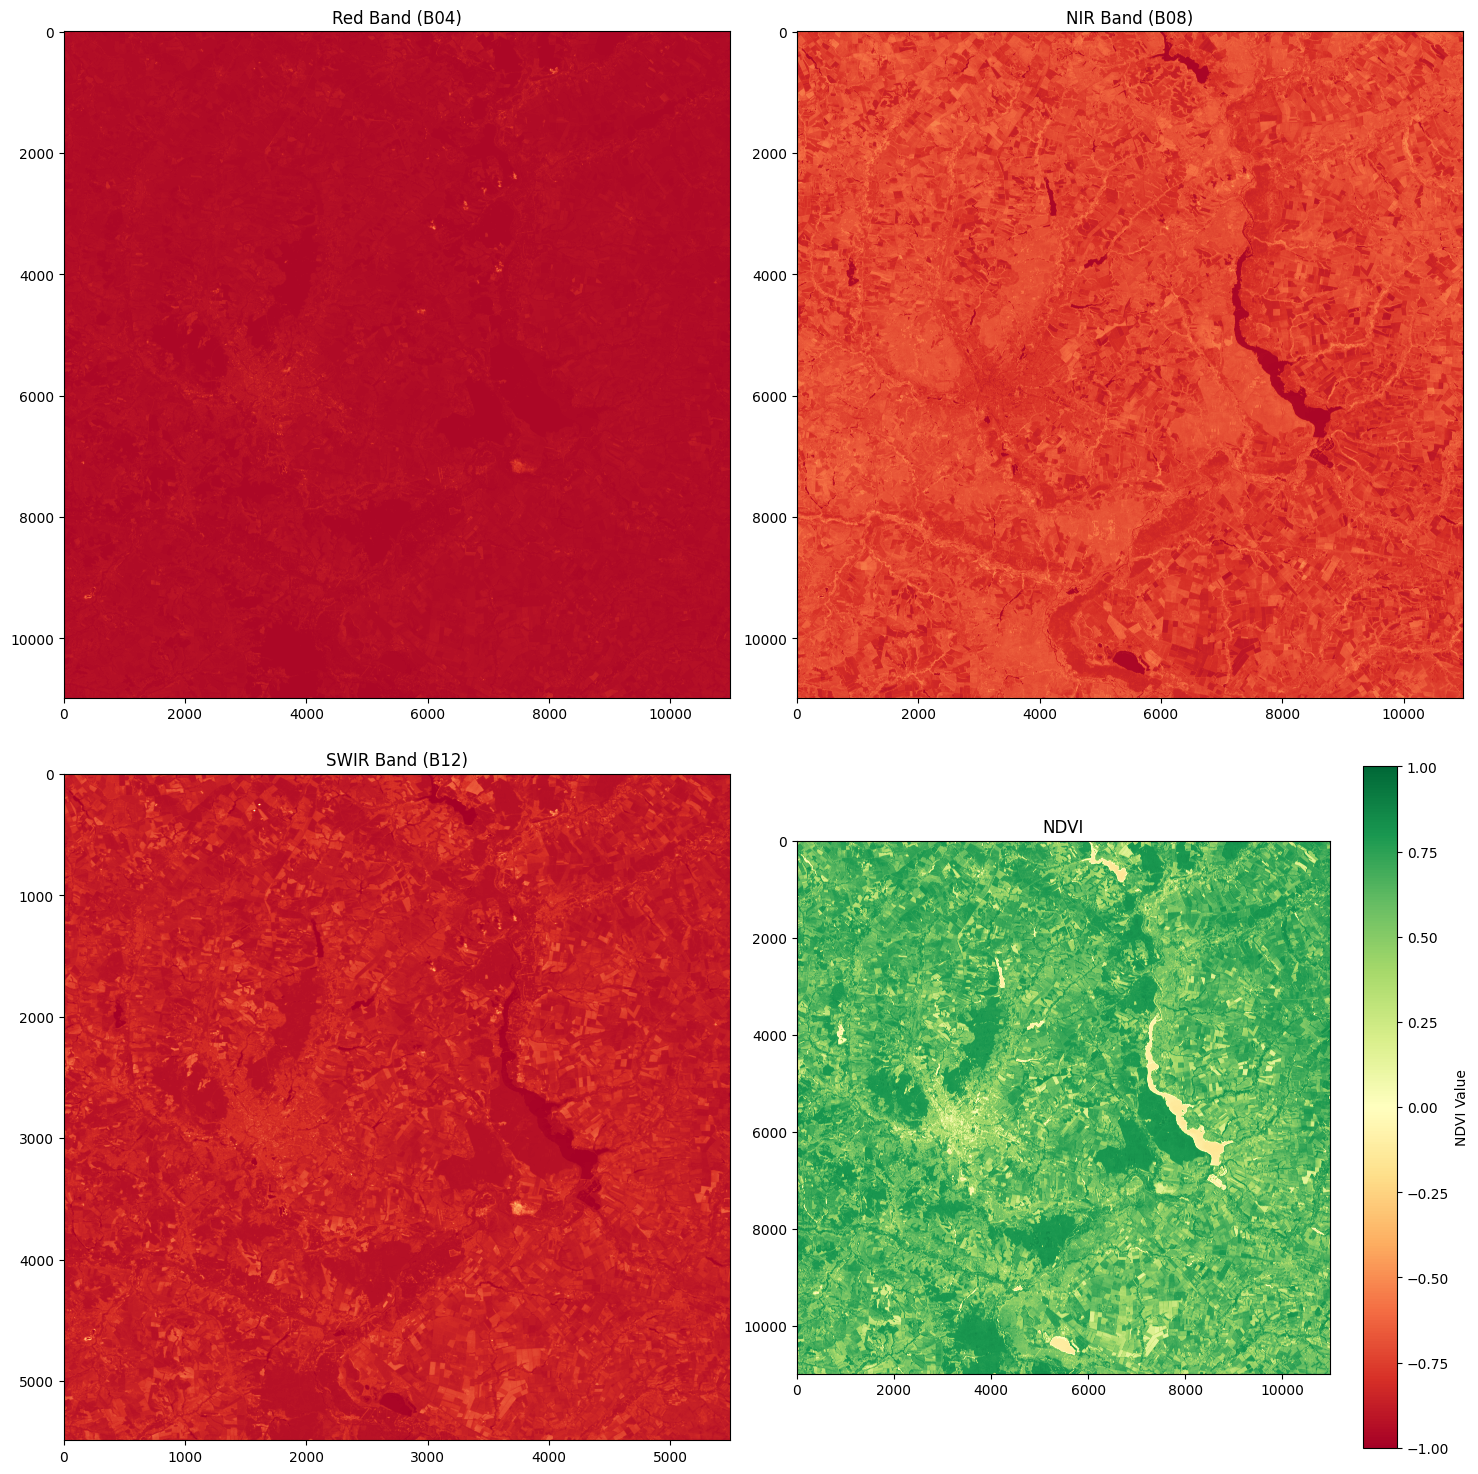


NDVI Statistics:
--------------------------------------------------
Mean NDVI: 0.616
Median NDVI: 0.656
Min NDVI: -1.000
Max NDVI: 1.000


In [15]:
# Let's load one image using key bands for vegetation analysis
# B04 (RED), B08 (NIR), B12 (SWIR)
sample_image = safe_dirs[0]
img_data_path = list((sample_image / "GRANULE").glob("*"))[0] / "IMG_DATA"

# Function to load and normalize band
def load_band(band_path):
    with rasterio.open(band_path) as src:
        band_data = src.read(1)
        # Normalize to 0-1 range
        band_data = band_data.astype(float)
        band_data = (band_data - band_data.min()) / (band_data.max() - band_data.min())
        return band_data

# Load the bands
red_band = load_band(list(img_data_path.glob(f"*_B04.jp2"))[0])
nir_band = load_band(list(img_data_path.glob(f"*_B08.jp2"))[0])
swir_band = load_band(list(img_data_path.glob(f"*_B12.jp2"))[0])

# Calculate NDVI (Normalized Difference Vegetation Index)
ndvi = (nir_band - red_band) / (nir_band + red_band)

# Visualize the bands and NDVI
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes[0,0].imshow(red_band, cmap='RdYlBu')
axes[0,0].set_title('Red Band (B04)')
axes[0,1].imshow(nir_band, cmap='RdYlBu')
axes[0,1].set_title('NIR Band (B08)')
axes[1,0].imshow(swir_band, cmap='RdYlBu')
axes[1,0].set_title('SWIR Band (B12)')
im = axes[1,1].imshow(ndvi, cmap='RdYlGn')
axes[1,1].set_title('NDVI')

# Add colorbar for NDVI
plt.colorbar(im, ax=axes[1,1], label='NDVI Value')

plt.tight_layout()
plt.show()

# Print some statistics about NDVI
print("\nNDVI Statistics:")
print("-" * 50)
print(f"Mean NDVI: {ndvi.mean():.3f}")
print(f"Median NDVI: {np.median(ndvi):.3f}")
print(f"Min NDVI: {ndvi.min():.3f}")
print(f"Max NDVI: {ndvi.max():.3f}")

Comparing images from:
Early date: 20160212T084052
Late date: 20190909T083559


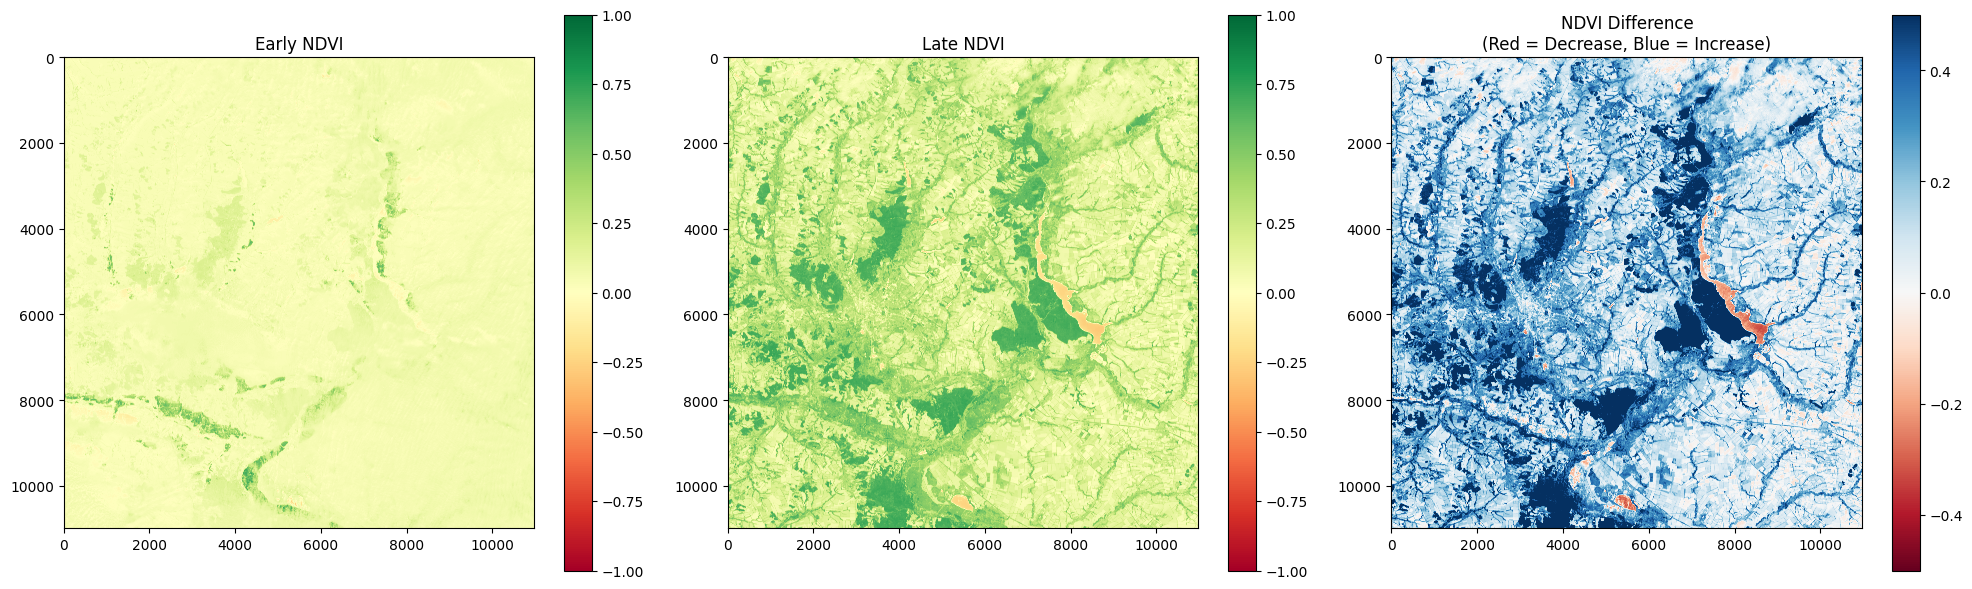


NDVI Change Statistics:
--------------------------------------------------
Mean change: 0.201
Standard deviation: 0.186
Max decrease: -1.214
Max increase: 1.014

Potential deforestation (NDVI decrease > 0.2):
Area affected: 0.43% of total area


In [16]:
# Let's select two images from different time periods
sorted_images = sorted(safe_dirs, key=lambda x: x.name)
early_image = sorted_images[0]  # First image
late_image = sorted_images[-1]  # Last image

# Print the dates we're comparing
print(f"Comparing images from:")
print(f"Early date: {early_image.name.split('_')[2]}")
print(f"Late date: {late_image.name.split('_')[2]}")

def calculate_ndvi(image_path):
    img_data_path = list((image_path / "GRANULE").glob("*"))[0] / "IMG_DATA"
    
    # Load RED and NIR bands
    red_band = load_band(list(img_data_path.glob(f"*_B04.jp2"))[0])
    nir_band = load_band(list(img_data_path.glob(f"*_B08.jp2"))[0])
    
    # Calculate NDVI
    ndvi = (nir_band - red_band) / (nir_band + red_band)
    return ndvi

# Calculate NDVI for both dates
ndvi_early = calculate_ndvi(early_image)
ndvi_late = calculate_ndvi(late_image)

# Calculate NDVI difference
ndvi_diff = ndvi_late - ndvi_early

# Visualize the changes
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Early NDVI
im1 = axes[0].imshow(ndvi_early, cmap='RdYlGn', vmin=-1, vmax=1)
axes[0].set_title('Early NDVI')
plt.colorbar(im1, ax=axes[0])

# Late NDVI
im2 = axes[1].imshow(ndvi_late, cmap='RdYlGn', vmin=-1, vmax=1)
axes[1].set_title('Late NDVI')
plt.colorbar(im2, ax=axes[1])

# NDVI Difference
im3 = axes[2].imshow(ndvi_diff, cmap='RdBu', vmin=-0.5, vmax=0.5)
axes[2].set_title('NDVI Difference\n(Red = Decrease, Blue = Increase)')
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()

# Calculate statistics of changes
print("\nNDVI Change Statistics:")
print("-" * 50)
print(f"Mean change: {ndvi_diff.mean():.3f}")
print(f"Standard deviation: {ndvi_diff.std():.3f}")
print(f"Max decrease: {ndvi_diff.min():.3f}")
print(f"Max increase: {ndvi_diff.max():.3f}")

# Calculate potential deforestation areas
threshold = -0.2  # Significant NDVI decrease
deforested_pixels = np.sum(ndvi_diff < threshold)
total_pixels = ndvi_diff.size
deforested_percentage = (deforested_pixels / total_pixels) * 100

print(f"\nPotential deforestation (NDVI decrease > {abs(threshold)}):")
print(f"Area affected: {deforested_percentage:.2f}% of total area")

Comparing summer images from:
Early date: 2016-06-18
Late date: 2019-08-30


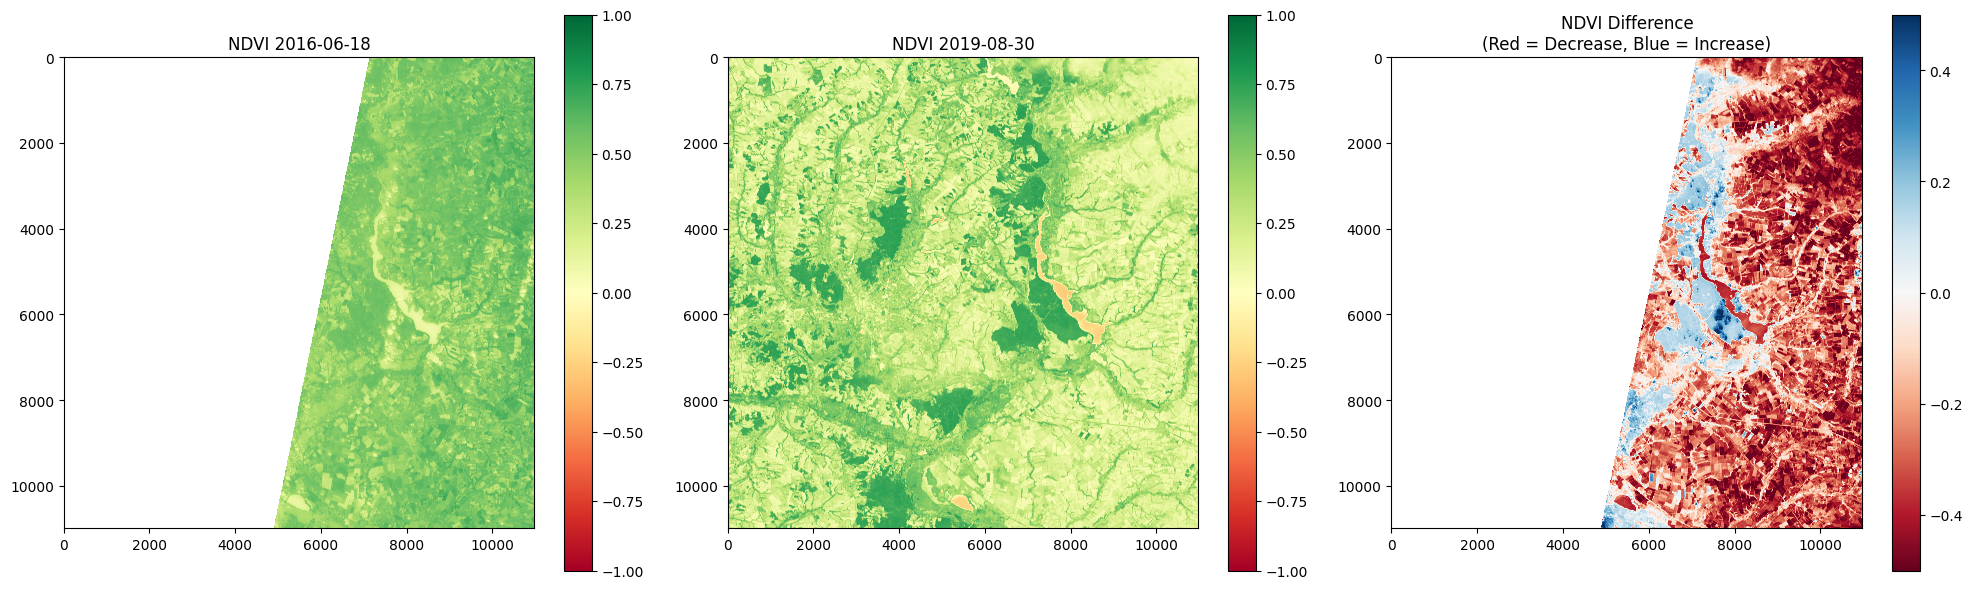


NDVI Change Statistics (Summer to Summer):
--------------------------------------------------
Mean change: -0.218
Standard deviation: 0.217
Max decrease: -1.122
Max increase: 0.732

Potential deforestation (NDVI decrease > 0.2):
Area affected: 59.48% of valid area

NDVI Distribution Statistics (valid regions only):
--------------------------------------------------
Early summer mean NDVI: 0.492
Late summer mean NDVI: 0.317
Early summer median NDVI: 0.516
Late summer median NDVI: 0.257
Percentage of valid pixels: 45.4%


In [19]:
# Filter for summer images (June, July, August)
summer_images = []
for img_path in safe_dirs:
    date_str = img_path.name.split('_')[2]
    date = datetime.strptime(date_str, '%Y%m%dT%H%M%S')
    if date.month in [6, 7, 8]:  # Summer months
        summer_images.append((date, img_path))

# Sort by date
summer_images.sort(key=lambda x: x[0])

# Select earliest and latest summer images
early_summer = summer_images[0]
late_summer = summer_images[-1]

print(f"Comparing summer images from:")
print(f"Early date: {early_summer[0].strftime('%Y-%m-%d')}")
print(f"Late date: {late_summer[0].strftime('%Y-%m-%d')}")

# Modified code with proper handling of invalid values
def calculate_ndvi_masked(image_path):
    img_data_path = list((image_path / "GRANULE").glob("*"))[0] / "IMG_DATA"
    
    # Load RED and NIR bands
    red_band = load_band(list(img_data_path.glob(f"*_B04.jp2"))[0])
    nir_band = load_band(list(img_data_path.glob(f"*_B08.jp2"))[0])
    
    # Create mask for valid pixels
    valid_mask = (red_band + nir_band) != 0
    
    # Calculate NDVI with masking
    ndvi = np.zeros_like(red_band)
    ndvi[valid_mask] = (nir_band[valid_mask] - red_band[valid_mask]) / (nir_band[valid_mask] + red_band[valid_mask])
    
    # Mask invalid values
    ndvi = np.ma.masked_array(ndvi, ~valid_mask)
    return ndvi, valid_mask

# Calculate NDVI for both dates with masks
ndvi_early, mask_early = calculate_ndvi_masked(early_summer[1])
ndvi_late, mask_late = calculate_ndvi_masked(late_summer[1])

# Combined mask for valid pixels in both images
valid_mask = mask_early & mask_late

# Calculate NDVI difference only for valid pixels
ndvi_diff = np.ma.masked_array(ndvi_late - ndvi_early, ~valid_mask)

# Visualize the changes
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Early NDVI
im1 = axes[0].imshow(ndvi_early, cmap='RdYlGn', vmin=-1, vmax=1)
axes[0].set_title(f'NDVI {early_summer[0].strftime("%Y-%m-%d")}')
plt.colorbar(im1, ax=axes[0])

# Late NDVI
im2 = axes[1].imshow(ndvi_late, cmap='RdYlGn', vmin=-1, vmax=1)
axes[1].set_title(f'NDVI {late_summer[0].strftime("%Y-%m-%d")}')
plt.colorbar(im2, ax=axes[1])

# NDVI Difference
im3 = axes[2].imshow(ndvi_diff, cmap='RdBu', vmin=-0.5, vmax=0.5)
axes[2].set_title('NDVI Difference\n(Red = Decrease, Blue = Increase)')
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()

# Calculate statistics of changes for valid pixels only
print("\nNDVI Change Statistics (Summer to Summer):")
print("-" * 50)
print(f"Mean change: {np.ma.mean(ndvi_diff):.3f}")
print(f"Standard deviation: {np.ma.std(ndvi_diff):.3f}")
print(f"Max decrease: {np.ma.min(ndvi_diff):.3f}")
print(f"Max increase: {np.ma.max(ndvi_diff):.3f}")

# Calculate potential deforestation areas with valid mask
threshold = -0.2
deforested_pixels = np.sum((ndvi_diff < threshold) & valid_mask)
total_valid_pixels = np.sum(valid_mask)
deforested_percentage = (deforested_pixels / total_valid_pixels) * 100 if total_valid_pixels > 0 else 0

print(f"\nPotential deforestation (NDVI decrease > {abs(threshold)}):")
print(f"Area affected: {deforested_percentage:.2f}% of valid area")

# Additional statistics for valid regions
print("\nNDVI Distribution Statistics (valid regions only):")
print("-" * 50)
print(f"Early summer mean NDVI: {np.ma.mean(ndvi_early):.3f}")
print(f"Late summer mean NDVI: {np.ma.mean(ndvi_late):.3f}")
print(f"Early summer median NDVI: {np.ma.median(ndvi_early):.3f}")
print(f"Late summer median NDVI: {np.ma.median(ndvi_late):.3f}")
print(f"Percentage of valid pixels: {(total_valid_pixels/ndvi_diff.size*100):.1f}%")